# Predicting Diets Based On Nutritional Contents Of Dishes


#### By Team 10 - The Foodies
#### Matthew Wang, Jessica Liu, Angel Xu, Kiana Roshanzamir

## Introduction

#### *“Given a dish’s nutritional contents, what kind of diet it is most likely a part of?”*


In our project, we will explore the relationship between a dish’s diet type and its nutritional contents. More specifically, we will focus on dishes from the following diets: Paleo, Dash, Keto, Mediterranean, and Vegan. Since this topic is a classification problem, we will be using training data to classify and predict the diet type of a new dish using its nutritional contents as predictors: protein, carbs, and fat, which are measured in grams. 
 
About the Dataset:

We found the data set on Kaggle, which is a platform that contains datasets gathered from surveys and studies. The raw dataset has 8 columns, including diet type, recipe name, the cuisine the dish belongs to, the amount of protein, carbs, fat, as well as “Extraction_day” and “Extraction_time”. The total dataset has 7806 rows of data.

In [1]:
library(tidyverse)
library(patchwork)
library(RColorBrewer)
library(repr)
library(tidymodels)
library(rvest)
library(readr)
options(repr.matrix.max.rows = 6)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [2]:
diets_original <- read_delim("https://raw.githubusercontent.com/mwang516/Foodies/main/All_Diets.csv",
                   skip = 1,
                   col_names = c("diet_type", "recipe_name", "cuisine_type", "protein", "carbs", "fat", "extraction_day", "extraction_time"))

diets_original # The dataset

Rows: 7806 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): diet_type, recipe_name, cuisine_type
dbl  (3): protein, carbs, fat
date (1): extraction_day
time (1): extraction_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


diet_type,recipe_name,cuisine_type,protein,carbs,fat,extraction_day,extraction_time
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<date>,<time>
paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20,2022-10-16,17:20:09
paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet & Crispy Appetizer",south east asian,181.55,28.62,146.14,2022-10-16,17:20:09
paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76,2022-10-16,17:20:09
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
dash,Luis Buñuel Dry Martini,world,0.01,0.39,0.00,2022-10-16,20:40:44
dash,Cornflake Semi-Fried Chicken Tenders,american,155.38,239.88,260.84,2022-10-16,20:40:44
dash,Emeril's Classic Manhattan,american,0.02,0.83,0.00,2022-10-16,20:40:44


In [3]:
set.seed(69)

diets <- diets_original |>  # Training Data
    select(diet_type, protein, carbs, fat) |>
    mutate(diet_type = as_factor(diet_type))

diets_split <- initial_split(diets, prop = 0.75, strata = diet_type)
diets_train <- training(diets_split)
diets_test <- testing(diets_split)

print("Training Data")
diets_train

diets_count <- diets_train |>  # Summary of Count of Each Diet
    group_by(diet_type) |>
    summarize(count = n())
print("Summary of Count of Each Diet")
diets_count

diets_nutrition_avg <- diets_train |>  # Summary of Average Nutritional Content of Each Diet
    group_by(diet_type) |>
    summarize(protein_mean = mean(protein),
             carbs_mean = mean(carbs),
             fat_mean = mean(fat))
print("Summary of Average Nutritional Content of Each Diet")
diets_nutrition_avg

[1] "Training Data"


diet_type,protein,carbs,fat
<fct>,<dbl>,<dbl>,<dbl>
dash,1.90,236.76,1.02
dash,137.31,120.32,35.92
dash,29.41,75.78,47.80
⋮,⋮,⋮,⋮
vegan,56.28,65.62,90.77
vegan,28.65,364.77,168.68
vegan,60.29,469.33,108.76


[1] "Summary of Count of Each Diet"


diet_type,count
<fct>,<int>
paleo,955
vegan,1141
keto,1134
mediterranean,1314
dash,1308


[1] "Summary of Average Nutritional Content of Each Diet"


diet_type,protein_mean,carbs_mean,fat_mean
<fct>,<dbl>,<dbl>,<dbl>
paleo,88.85634,128.57928,137.4332
vegan,56.07040,253.41222,103.2545
keto,101.20914,58.01987,154.7812
mediterranean,99.70286,151.82721,103.5231
dash,70.60565,165.07945,103.3729


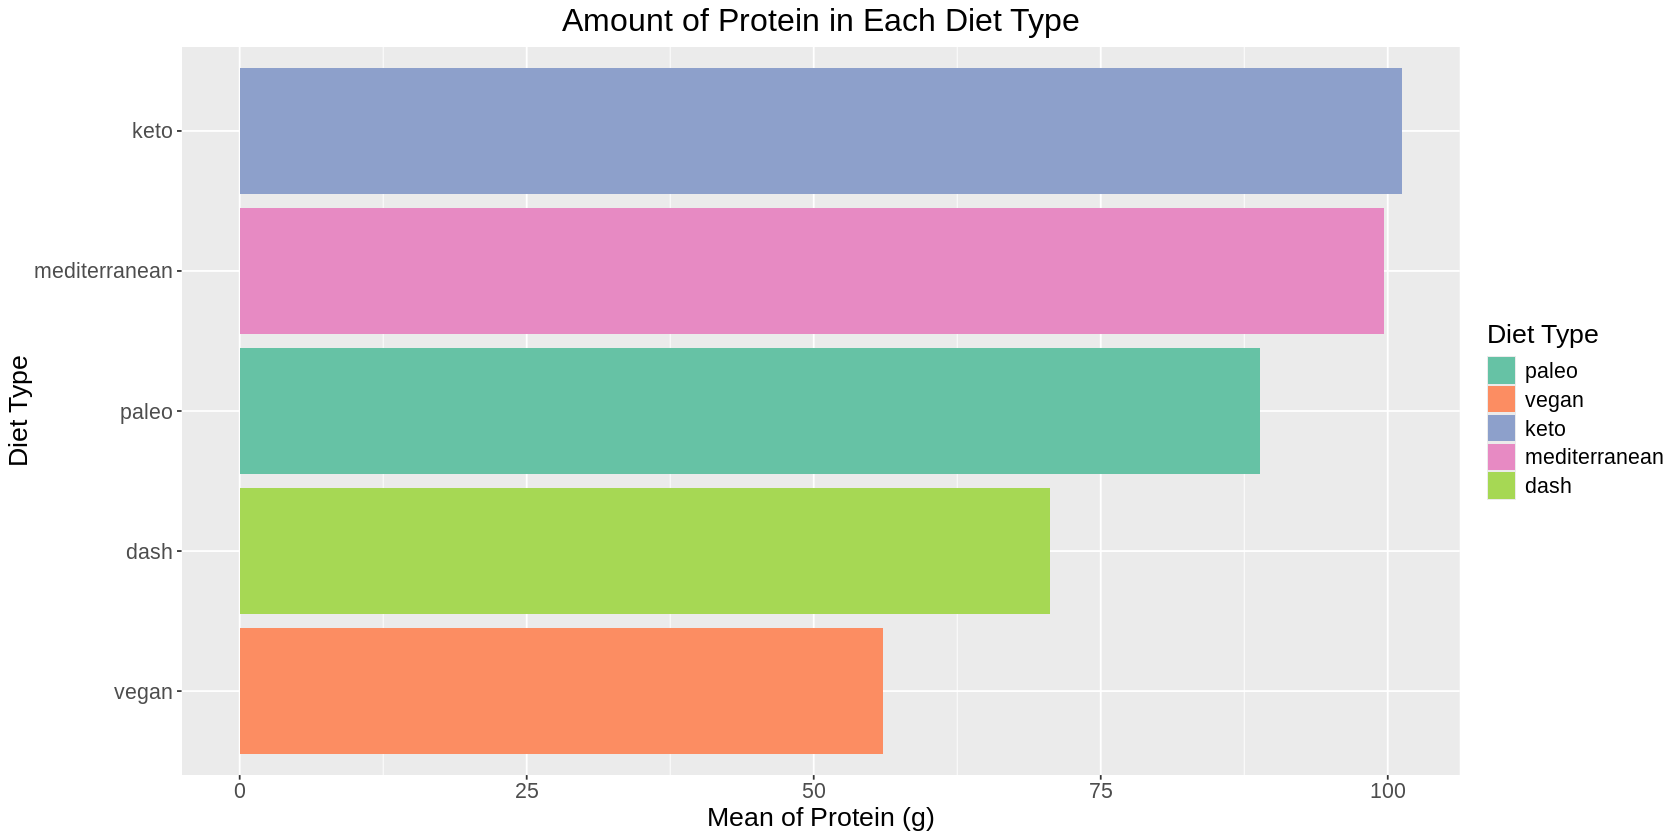

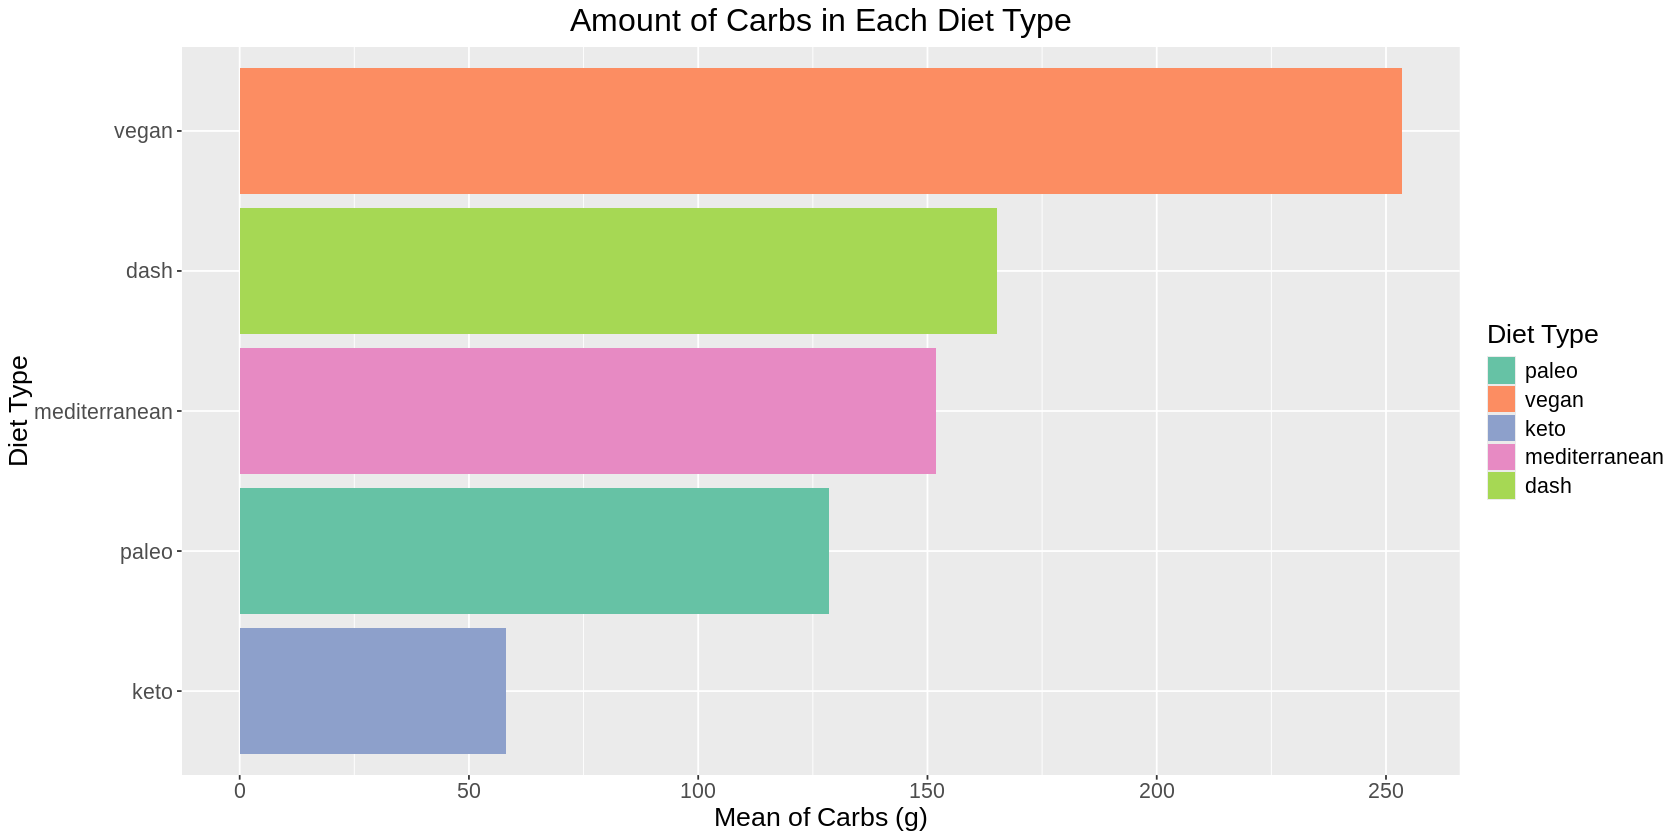

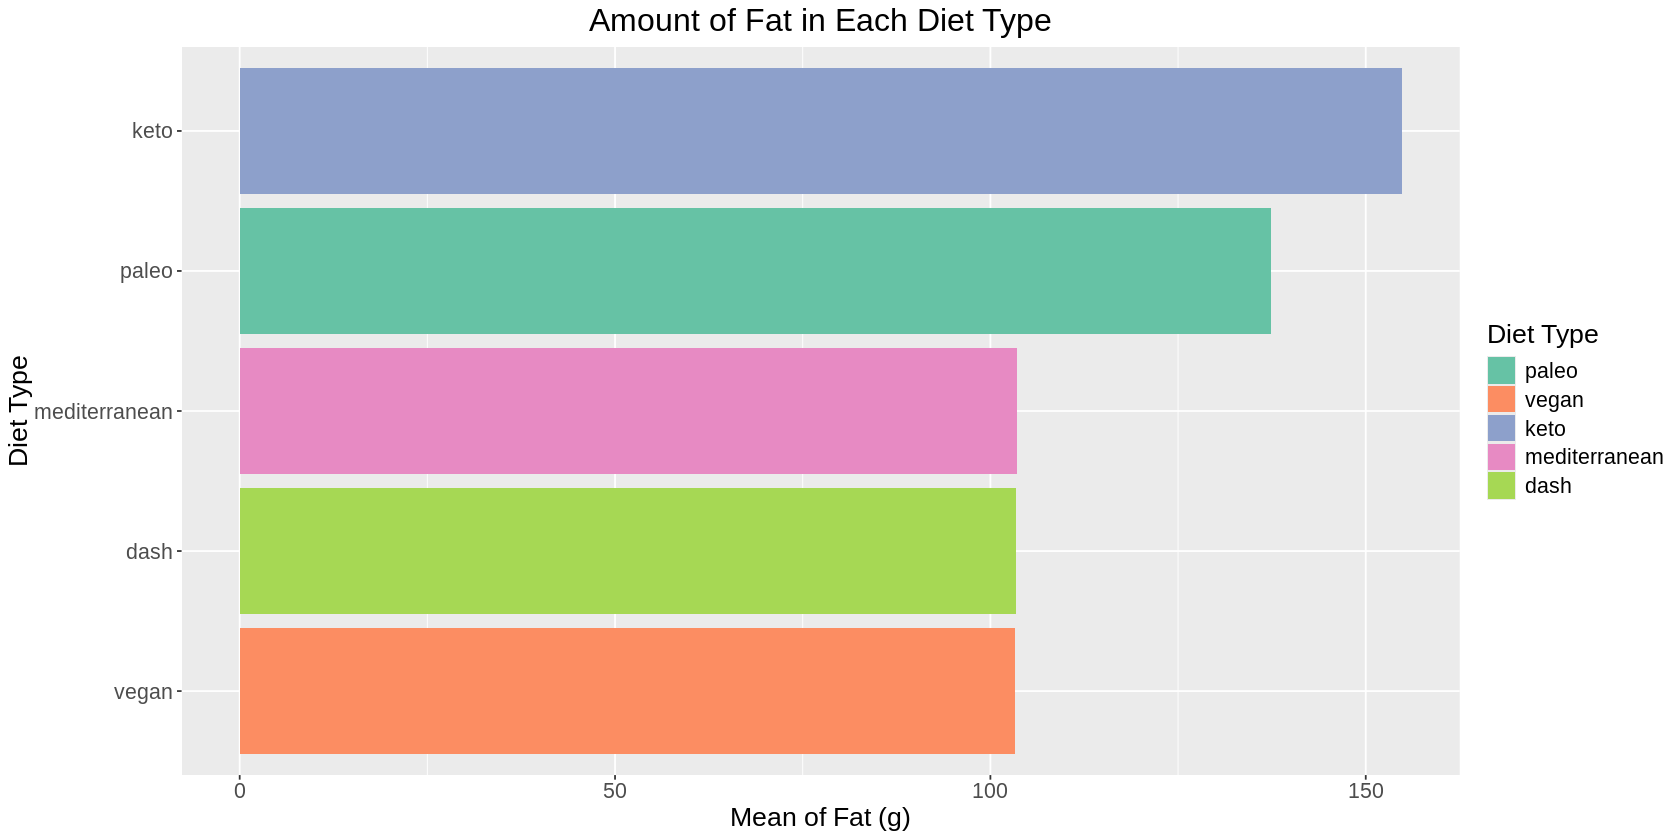

In [4]:
options(repr.plot.width = 14, repr.plot.height = 7)

diets_protein_plot <- diets_nutrition_avg |>
    ggplot(aes(x = protein_mean, y = fct_reorder(diet_type, protein_mean), fill = diet_type)) +
    geom_bar(stat = "identity") +
    xlab("Mean of Protein (g)") +
    ylab("Diet Type") +
    labs(fill = "Diet Type") +
    scale_fill_brewer(palette = 'Set2') +
    ggtitle("Amount of Protein in Each Diet Type") +
    theme(text = element_text(size = 16), plot.title = element_text(hjust = 0.5)) 
diets_protein_plot

diets_carbs_plot <- diets_nutrition_avg |>
    ggplot(aes(x = carbs_mean, y = fct_reorder(diet_type, carbs_mean), fill = diet_type)) +
    geom_bar(stat = "identity") +
    xlab("Mean of Carbs (g)") +
    ylab("Diet Type") +
    labs(fill = "Diet Type") +
    scale_fill_brewer(palette = 'Set2') +
    ggtitle("Amount of Carbs in Each Diet Type") +
    theme(text = element_text(size = 16), plot.title = element_text(hjust = 0.5))
diets_carbs_plot

diets_fat_plot <- diets_nutrition_avg |>
    ggplot(aes(x = fat_mean, y = fct_reorder(diet_type, fat_mean), fill = diet_type)) +
    geom_bar(stat = "identity") +
    xlab("Mean of Fat (g)") +
    ylab("Diet Type") +
    labs(fill = "Diet Type") +
    scale_fill_brewer(palette = 'Set2') +
    ggtitle("Amount of Fat in Each Diet Type") +
    theme(text = element_text(size = 16), plot.title = element_text(hjust = 0.5))
diets_fat_plot

## Methods

- We will first start by using the tune method and conduct a 5-fold analysis to find the best k-value for our k nearest neighbour algorithm by examining and plotting the accuracy of the algorithm and taking the k-value with the highest . To conduct the classification analysis, we will create a recipe to standardize the training data. Then, we will create a recipe as well as a model. Testing data from the split will be used to examine our findings’ accuracy, precision, recall, and we’ll use a confusion matrix to determine the effectiveness of our analysis.
- For the prediction, we are trying to predict the diet_type of each dish by using protein, carbs, and fat as the predictors. We are not using its name, cuisine, or the extraction time as those columns are irrelevant.
- One way we can visualize our results is to create two bar plots, one with the testing data and its diet type and the other with the predictions we made. Through that, we will be able to see how effective our model and prediction is. 

## Expected outcomes and significance:


- By observing the nutritional means of the diets, we predict that a dish with high carbs and low protein is likely to be vegan, and a dish with high fat and low carbs is likely to be keto. For the other three diets, namely Mediterranean, Dash, and Paleo, we are unable to make a good prediction since they are similar with each other in terms of nutritional content.
- Our findings are beneficial for people who are aware of their consumption and want to know more about what they're eating, providing them with information about specific dishes and the diet type that it belongs to. Another use could be assisting with dish recommendation, since we have organized and predicted the dishes' respective diet type according to its nutritional content.
- One future question that could be explored is predicting the dish's cuisine type with the same predictors instead of diet type. It’s interesting to examine the relationship between what a dish contains and its cuisine. Additionally, we can research the relationship between regions around the world and diet; more specifically, what diet is more prevalent in which parts of the world. 

In [ ]:
set.seed(69)
# v-fold analysis and plot
diets_recipe <- recipe(diet_type~., data = diets_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

diets_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

diets_vfold <- vfold_cv(diets_train, v = 5, strata = diet_type)

knn_tune_fit <- workflow() |>
	add_recipe(diets_recipe) |>
	add_model(diets_spec) |>
	tune_grid(resamples = diets_vfold, grid =  tibble(neighbors = c(seq(from = 30, to = 42, by = 1)))) |>
    collect_metrics() |>
    filter(.metric == "accuracy")

knn_plot <- ggplot(knn_tune_fit, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Mean")
knn_plot

In [74]:
# classification process
best_k <- 34 # the k-value with the highest accuracy from the plot above
diets_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
    set_engine("kknn") |>
    set_mode("classification")

diets_best_fit <- workflow() |>
    add_recipe(diets_recipe) |>
    add_model(diets_best_spec) |>
    fit(data = diets_train)

diets_test_predictions <- predict(diets_best_fit, diets_test) |>
    bind_cols(diets_test)

diets_test_predictions |>
  metrics(truth = diet_type, estimate = .pred_class) |>
  filter(.metric == "accuracy")
diets_test_predictions

diets_conf_mat <- conf_mat(diets_test_predictions, truth = diet_type, estimate = .pred_class)
diets_conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.4380757


.pred_class,diet_type,protein,carbs,fat
<fct>,<fct>,<dbl>,<dbl>,<dbl>
mediterranean,paleo,68.62,34.15,42.44
vegan,paleo,152.88,1874.52,385.80
vegan,paleo,46.69,192.54,156.48
⋮,⋮,⋮,⋮,⋮
vegan,dash,65.37,787.82,181.09
mediterranean,dash,85.20,288.14,137.15
dash,dash,155.38,239.88,260.84


               Truth
Prediction      paleo vegan keto mediterranean dash
  paleo            55    26   19            32   35
  vegan            75   215   20            91  121
  keto             87    23  261            79   67
  mediterranean    72    75   54           193   82
  dash             30    42   24            44  132

Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”
Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


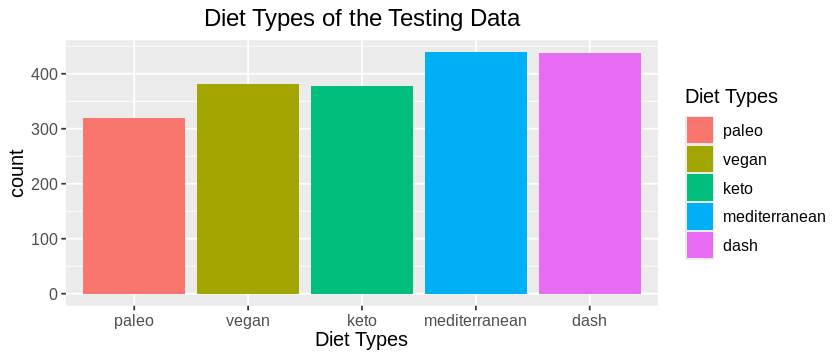

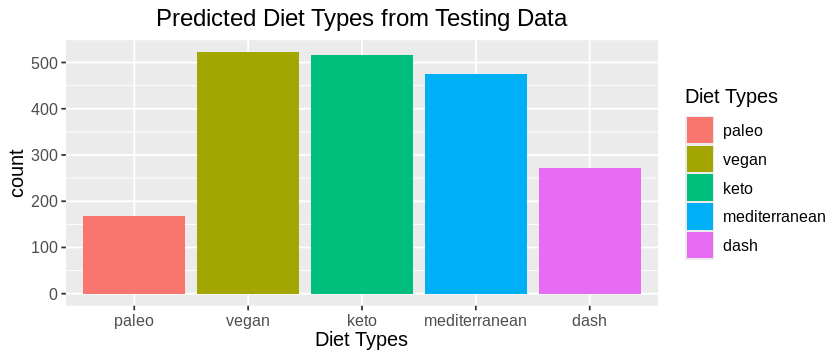

In [72]:
options(repr.plot.width = 7, repr.plot.height = 3)

diets_test_plot <- ggplot(diets_test, aes(x = diet_type, fill = diet_type)) +  #testing data
geom_histogram(stat = "count") +
labs(x = "Diet Types", fill = "Diet Types") +
ggtitle("Diet Types of the Testing Data") +
theme(text = element_text(size = 12), plot.title = element_text(hjust = 0.5))

diets_test_plot
 
diets_predictions_plot <- ggplot(diets_predictions, aes(x = .pred_class, fill = .pred_class)) + #results from data
geom_histogram(stat = "count") +
labs(x = "Diet Types", fill = "Diet Types") +
ggtitle("Predicted Diet Types from Testing Data") +
theme(text = element_text(size = 12), plot.title = element_text(hjust = 0.5))

diets_predictions_plot

In the above visualizations, we plotted the count of diet types in the testing data as well as the predicted diet types from the same data in order to compare visually how accurate the predictions are. We filled the columns by color corresponding to different diet types, and we also gave it readable axis and a title, as well as a legend.